In [229]:
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd

import pathlib

In [230]:
data_folders = [
    pathlib.Path('./data/bicing/2021'),
    pathlib.Path('./data/bicing/2022'),
]

In [231]:
df_climate_ = pd.read_csv('./data/clima.csv', parse_dates=['time'])

df_climate = df_climate_.assign(
    year=df_climate_.time.dt.year,
    month=df_climate_.time.dt.month,
    day=df_climate_.time.dt.day,
    hour=df_climate_.time.dt.hour
)

In [232]:
df = pd.concat([pd.read_csv(file, index_col=0) for data_folder in data_folders for file in data_folder.glob('*.csv') ])

In [233]:
display(df.head())
display(df.describe())

,station_id,last_updated_hour,year,month,day,hour,num_bikes_available,num_bikes_available_types.mechanical,num_bikes_available_types.ebike,num_docks_available
0,1,2021-09-30 23:00:00,2021,9,30,23,37.000000,34.000000,3.000000,1.000000
1,1,2021-10-01 00:00:00,2021,10,1,0,36.818182,35.000000,1.818182,1.181818
2,1,2021-10-01 01:00:00,2021,10,1,1,22.307692,20.615385,1.692308,15.692308
3,1,2021-10-01 02:00:00,2021,10,1,2,23.000000,21.000000,2.000000,15.000000
4,1,2021-10-01 03:00:00,2021,10,1,3,24.909091,21.363636,3.545455,14.909091


,station_id,year,month,day,hour,num_bikes_available,num_bikes_available_types.mechanical,num_bikes_available_types.ebike,num_docks_available
count,8.845300e+06,8.845300e+06,8.845300e+06,8.845300e+06,8.845300e+06,8.845300e+06,8.845300e+06,8.845300e+06,8.845300e+06
mean,2.613641e+02,2.021501e+03,6.522817e+00,1.573879e+01,1.150972e+01,9.539113e+00,7.409572e+00,2.129541e+00,1.585939e+01
std,1.493576e+02,5.001125e-01,3.442819e+00,8.811913e+00,6.930531e+00,7.822728e+00,7.439830e+00,3.072225e+00,8.196244e+00
min,1.000000e+00,2.021000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.320000e+02,2.021000e+03,4.000000e+00,8.000000e+00,6.000000e+00,3.000000e+00,1.000000e+00,1.818182e-01,1.000000e+01
50%,2.630000e+02,2.022000e+03,7.000000e+00,1.600000e+01,1.200000e+01,8.000000e+00,5.272727e+00,1.000000e+00,1.608333e+01
75%,3.890000e+02,2.022000e+03,1.000000e+01,2.300000e+01,1.800000e+01,1.458333e+01,1.200000e+01,2.750000e+00,2.183333e+01
max,5.320000e+02,2.023000e+03,1.200000e+01,3.100000e+01,2.300000e+01,1.980000e+02,9.900000e+01,9.900000e+01,9.900000e+01


In [157]:
df = pd.merge(left=df, right=df_climate.drop(columns=['time']), on=['hour', 'day', 'month', 'year'])

In [158]:
METRICS = ['num_bikes_available', 'num_bikes_available_types.mechanical',
           'num_bikes_available_types.ebike', 'num_docks_available']

In [159]:
df = df.assign(
    percentage_docks_available=df.num_docks_available / (df.num_docks_available + df.num_bikes_available)
)

In [160]:
df.percentage_docks_available.describe()

count    4.064939e+06
mean     6.347720e-01
std      2.782228e-01
min      0.000000e+00
25%      4.333333e-01
50%      6.858974e-01
75%      8.800000e-01
max      1.000000e+00
Name: percentage_docks_available, dtype: float64

In [161]:
df.head()

,station_id,last_updated_hour,year,month,day,hour,num_bikes_available,num_bikes_available_types.mechanical,num_bikes_available_types.ebike,num_docks_available,temperature_2m,total_cloud_cover,total_precipitation,windspeed_10m,percentage_docks_available
0,1,2022-02-28 23:00:00,2022,2,28,23,16.0,14.0,2.0,29.0,282.195801,0.171013,0.0,3.586777,0.644444
1,2,2022-02-28 23:00:00,2022,2,28,23,24.0,22.0,2.0,5.0,282.195801,0.171013,0.0,3.586777,0.172414
2,3,2022-02-28 23:00:00,2022,2,28,23,8.0,8.0,0.0,18.0,282.195801,0.171013,0.0,3.586777,0.692308
3,4,2022-02-28 23:00:00,2022,2,28,23,2.0,2.0,0.0,19.0,282.195801,0.171013,0.0,3.586777,0.904762
4,5,2022-02-28 23:00:00,2022,2,28,23,23.0,23.0,0.0,16.0,282.195801,0.171013,0.0,3.586777,0.410256


# Data Cleaning
1. quitar null
2. quitar > 100% ocupacion
3. .......

# Transformations

In [165]:
from datetime import date

df = df.assign(
    is_summer=(df.month >= 6) & (df.month < 9),
    date=pd.to_datetime(dict(year=df.year, month=df.month, day=df.day))
)
df = df.assign(
    day_of_week=df.date.dt.day_of_week,
)
df = df.assign(
    is_weekend=df.day_of_week >= 5,
    is_night=(df.hour >= 20) or (df.hour < 8),
)

df = df.assign(
    temperature_2m=df.temperature_2m.astype(int),
    windspeed_10m=df.windspeed_10m.astype(int),
)

display(df.head())

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

# Simple Visualization

In [ ]:
df_hourly = df.assign(is_summer=(df.month >= 6) & (df.month < 9)).groupby(['hour', 'is_summer', 'station_id'],
                                                                          as_index=False).agg(
    {'percentage_docks_available': 'mean'})

In [ ]:
ax = sns.lineplot(
    data=df_hourly, x='hour', y='percentage_docks_available', hue='is_summer'
)
ax.set(
    title='(Avg.) Docks Available by Hour of the Day',
    xlabel="Hour of the Day",
    ylabel="Docks Available",
)
plt.show()

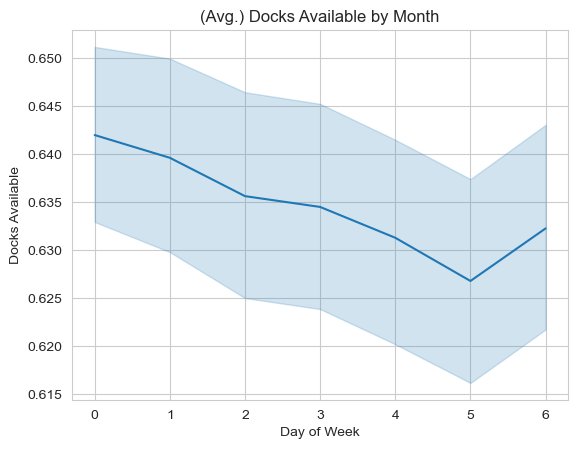

In [166]:
df_monthly = df.groupby(['day_of_week', 'station_id'], as_index=False).agg({'percentage_docks_available': 'mean'})

ax = sns.lineplot(
    data=df_monthly, x='day_of_week', y='percentage_docks_available'
)
ax.set(
    title='(Avg.) Docks Available by Month',
    xlabel="Day of Week",
    ylabel="Docks Available",
)
plt.show()


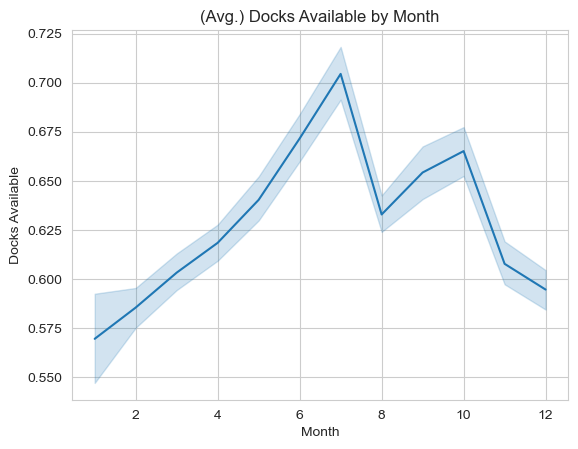

In [167]:
df_monthly = df.groupby(['month', 'station_id'], as_index=False).agg({'percentage_docks_available': 'mean'})

ax = sns.lineplot(
    data=df_monthly, x='month', y='percentage_docks_available',
)
ax.set(
    title='(Avg.) Docks Available by Month',
    xlabel="Month",
    ylabel="Docks Available",
)
plt.show()


# Train + Predict

In [209]:
FEATURES = [
    'month',
    'hour',
    'day',
    'day_of_week',
    'is_summer',
    'is_weekend',
    'temperature_2m',
    'total_cloud_cover',
    'total_precipitation',
    'windspeed_10m'
]
Y_COLUMN = 'percentage_docks_available'

df_ = df[~df[Y_COLUMN].isna()].sort_values(by=['last_updated_hour'])
X = df_[FEATURES].reset_index().drop(columns=['index'])
y = df_[Y_COLUMN].reset_index(drop=True)

In [210]:
y

0          0.194444
1          0.330247
2          0.117284
3          0.203704
4          0.416667
             ...   
4064934    0.370370
4064935    0.888889
4064936    0.984127
4064937    0.293478
4064938    1.000000
Name: percentage_docks_available, Length: 4064939, dtype: float64

In [220]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn import pipeline, ensemble, preprocessing, linear_model

num_columns = ["month", "hour", "day_of_week", 'temperature_2m']

ct1 = ColumnTransformer(
    [
        ("num_preprocess", preprocessing.StandardScaler(), num_columns)
    ],
    remainder='drop'
)

ct2 = ColumnTransformer(
    [
        ("num_preprocess", preprocessing.StandardScaler(), ["month"])
    ],
    remainder='drop'
)

pipes = [
    pipeline.Pipeline([
        ('transformer', ct1),
        ('regressor', ensemble.RandomForestRegressor()),
    ]),

    pipeline.Pipeline([
        ('transformer', ct1),
        ('regressor', linear_model.LinearRegression()),
    ]),

    pipeline.Pipeline([
        ('transformer', ct2),
        ('regressor', ensemble.RandomForestRegressor()),
    ]),
    #
    #   pipeline.Pipeline([
    #       ('transformer', ct3),
    #       ('regressor', linear_model.LinearRegression()),
    #   ]),

]

# Debug Pipe 1

In [221]:
# Debug pipe #1
pipe = pipes[1]
pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num_preprocess',
                                                  StandardScaler(),
                                                  ['month', 'hour',
                                                   'day_of_week',
                                                   'temperature_2m'])])),
                ('regressor', LinearRegression())])

In [222]:
from sklearn import metrics
scorer = metrics.get_scorer('neg_root_mean_squared_error')

Fold 0


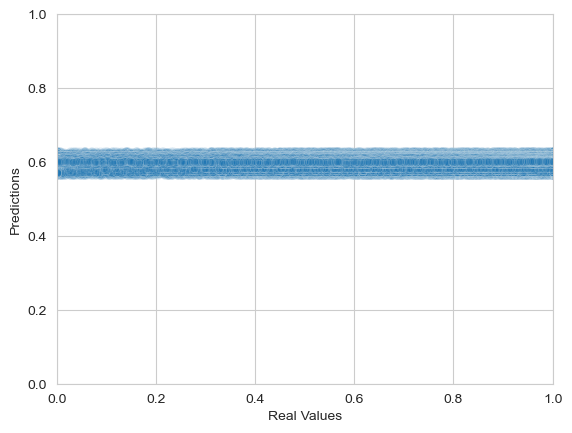

0.06938877740600333

Fold 1


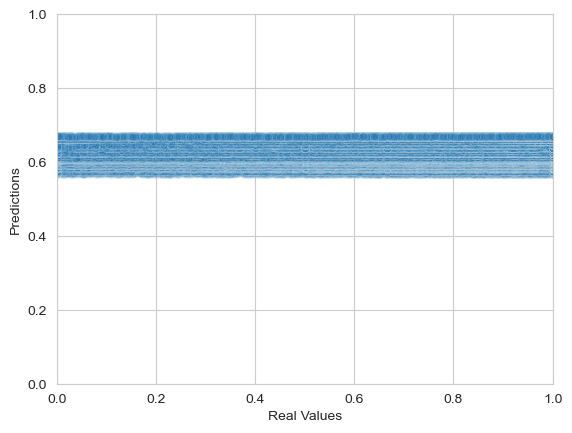

0.07497958250857009

Fold 2


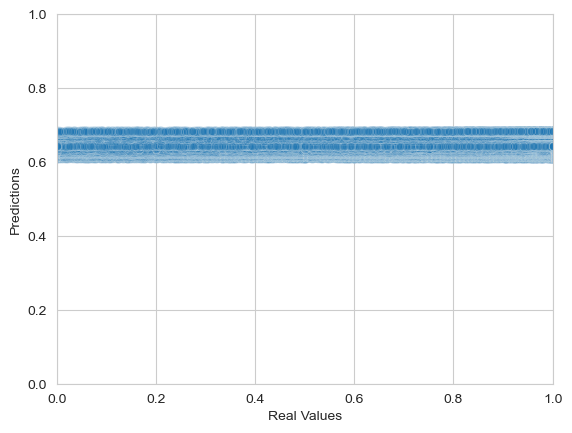

0.08232996050397041

Fold 3


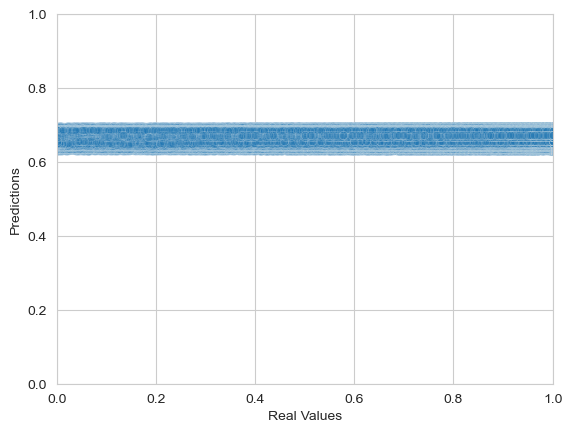

0.07990307607512014

Fold 4


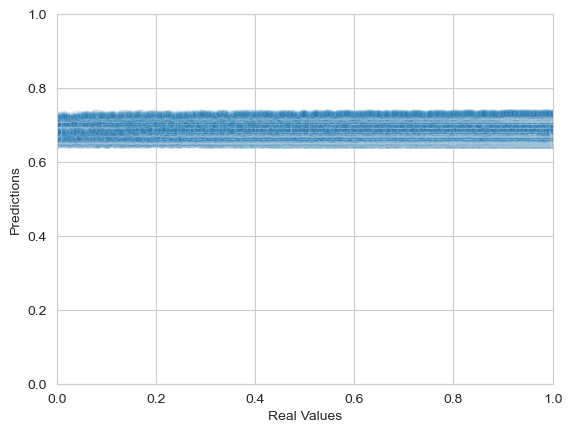

0.07628650220389517

Fold 5


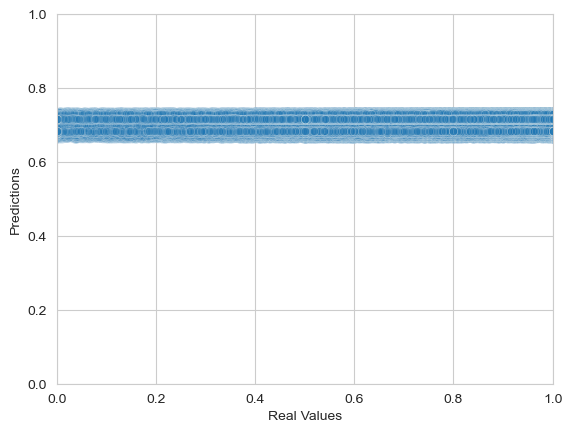

0.07671414694660005

Fold 6


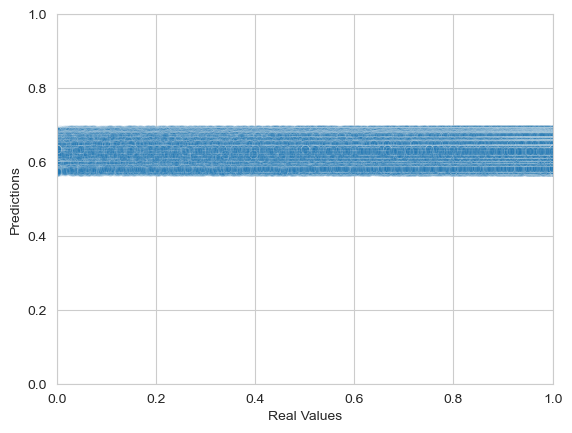

0.08531695774838094

Fold 7


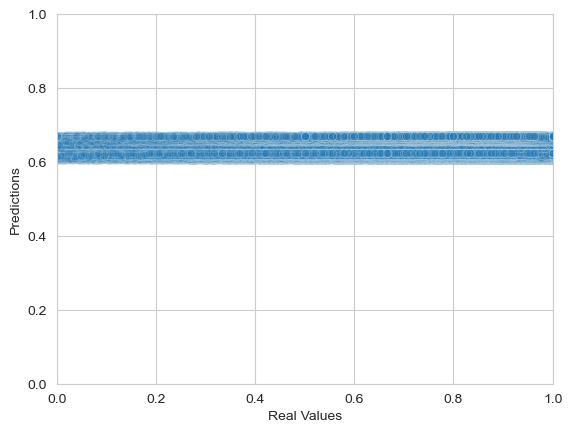

0.0762426606591076

Fold 8


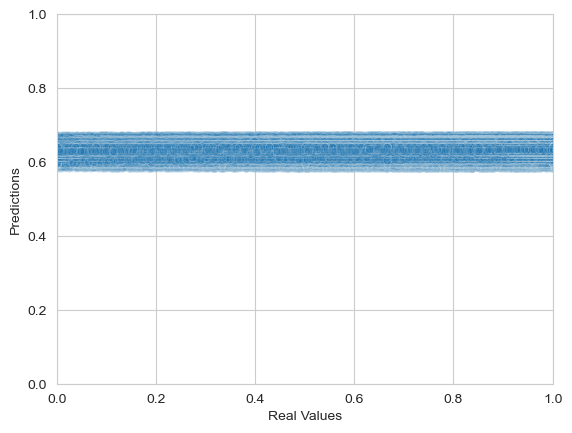

0.07876900760797957

Fold 9


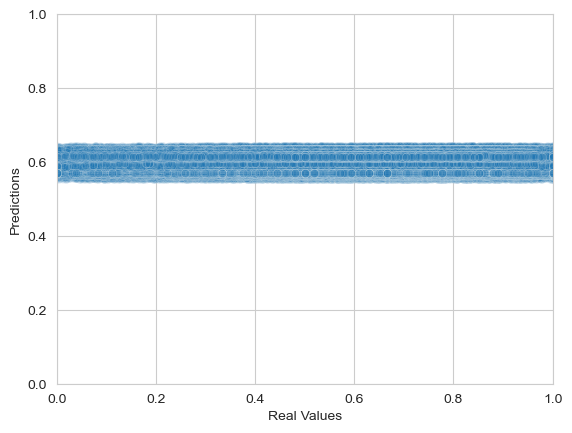

0.06789148714135518

In [225]:
from sklearn import model_selection

tscv = model_selection.TimeSeriesSplit(10)

for i, (train_index, test_index) in enumerate(tscv.split(X)):
    print(f"Fold {i}")

    train_X, train_y = X.loc[train_index], y.loc[train_index]
    test_X, test_y = X.loc[test_index], y.loc[test_index]

    pipe.fit(train_X, train_y)

    pred_y = pipe.predict(test_X)

    sns.scatterplot(x=test_y, y=pred_y, alpha=0.1)
    plt.xlabel('Real Values')
    plt.ylabel('Predictions')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.show()

    display(scorer._score_func(test_y, pred_y))



In [151]:
 from sklearn import model_selection

for pipe in pipes:
    display(pipe)
    cv_score = model_selection.cross_val_score(
        estimator=pipe,
        X=X, y=y,
        cv=model_selection.TimeSeriesSplit(5),
        scoring='neg_root_mean_squared_error',
        error_score='raise',
        verbose=3
    )

    display(cv_score)


Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num_preprocess',
                                                  StandardScaler(),
                                                  ['month', 'hour',
                                                   'day_of_week',
                                                   'temperature_2m'])])),
                ('regressor', RandomForestRegressor())])

array([-0.28911438, -0.28093877, -0.27970754, -0.27900248, -0.27685552])

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num_preprocess',
                                                  StandardScaler(),
                                                  ['month'])])),
                ('regressor', RandomForestRegressor())])

array([-0.27480861, -0.27598219, -0.27656357, -0.27683824, -0.27575679])

In [130]:
X.columns  #

Index(['month', 'hour', 'day', 'day_of_week', 'is_summer', 'is_weekend',
       'temperature_2m', 'total_cloud_cover', 'total_precipitation',
       'windspeed_10m'],
      dtype='object')

<AxesSubplot:xlabel='temperature_2m', ylabel='percentage_docks_available'>

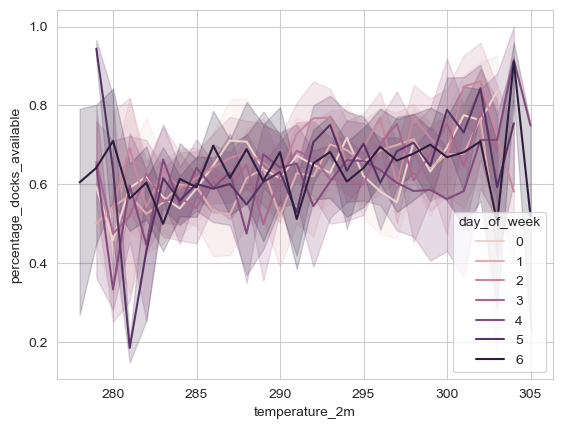

In [124]:
sns.lineplot(
    data=df.sample(frac=0.001),
    x='temperature_2m',
    y='percentage_docks_available',
    hue='day_of_week'
)